# Optimization for wind energy applications

## Nonlinear constrained optimization of simple mathematical functions.

First, if you are not familiar with linear algebra in python, work through the below.

The syntax is very similar to matlab but there are some differences.

In [2]:
# Start by importing numpy and creating some matrices
import numpy as np

# Linear Algebra - examples of basic matrix setup and operations
# generating standard matrix type
x=np.zeros((4,3))
print(x)

x=np.ones((3,4))
print(x)

x=np.eye(3)
print(x)


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [3]:
# Perform some basic operations

# fundamental operations for example matrices
A = np.array([[0, 1, -2],[ 3, 2, 5],[ 6, -1, 0]])
B = np.array([[3, -3, 12],[ 0, 4, 6]])
C = np.array([[5, 2, 1],[ -3, 7, 2],[ 1, 0, 6]])

# access particular cells in a matrix
print(A[2,0])
print(A[1,2])
# add matrices by cell
print(A + C)
# matrix multiplication element-wise
print(A*A)
print(np.multiply(A,A))
# matrix dot product
print(A.dot(A))


6
5
[[ 5  3 -1]
 [ 0  9  7]
 [ 7 -1  6]]
[[ 0  1  4]
 [ 9  4 25]
 [36  1  0]]
[[ 0  1  4]
 [ 9  4 25]
 [36  1  0]]
[[ -9   4   5]
 [ 36   2   4]
 [ -3   4 -17]]


In [4]:
# Next, operations for transposing matrices and dot products

# transpose matrix
print(np.transpose(B))
# matrix multiplication with transposed matrix
print(A.dot(np.transpose(B)))


[[ 3  0]
 [-3  4]
 [12  6]]
[[-27  -8]
 [ 63  38]
 [ 21  -4]]


In [5]:
# and try mixing operators

# mixing matrix operators
print(A.dot(A + C))
print(A*(A + C))
print(A^2+A*C)
print(A.dot(C))
print(C.dot(A))

# play around a bit!

[[-14  11  -5]
 [ 50  22  41]
 [ 30   9 -13]]
[[ 0  3  2]
 [ 0 18 35]
 [42  1  0]]
[[ 2  5 -2]
 [-6 18  9]
 [14 -3  2]]
[[ -5   7 -10]
 [ 14  20  37]
 [ 33   5   4]]
[[12  8  0]
 [33  9 41]
 [36 -5 -2]]


In [6]:
# finally, inverting matrices

# inverse of a matrix
print(np.linalg.inv(A))
print(A.dot(np.linalg.inv(A)))
print(np.linalg.inv(np.array([[1, -1], [2, -1]])))
A = np.array([[-1, 1], [-2, 1]])
print(A.dot(np.array([[1, -1],[ 2, -1]])))


[[ 0.08333333  0.03333333  0.15      ]
 [ 0.5         0.2        -0.1       ]
 [-0.25        0.1        -0.05      ]]
[[ 1.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  1.0000000e+00 -6.9388939e-17]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00]]
[[-1.  1.]
 [-2.  1.]]
[[1 0]
 [0 1]]


In [7]:
# and then finding the solution for a system of equations


# solving a simple system of equations
A = np.array([[2, 1, -1],[ 0, -1, 1],[ 1, 4, -5]])
b = np.array([1, -2, 0])
A1 = np.linalg.inv(A)
print(A1)
print(b)
x = A1.dot(b)
print(x)

[[ 0.5  0.5  0. ]
 [ 0.5 -4.5 -1. ]
 [ 0.5 -3.5 -1. ]]
[ 1 -2  0]
[-0.5  9.5  7.5]


### Now that you have refreshed your linear algebra skills in python, lets do constrained optimization with equality constraints

For our problem of f(x1,x2) = 0.25x1^2 + x2^2 with the constraint 5-x1-x2 = 0

In [8]:
# Constrained optimization - solving a system of equations for optimization

# with equality constraints
# after finding derivatives, create the A matrix and the b column vector
import numpy as np

A = np.array([[0.5,0,-1], [0,2,-1], [-1,-1,0]])
b = np.array([0, 0, -5])
print(A)
print(b)

x = np.linalg.inv(A).dot(b)
print(x)


[[ 0.5  0.  -1. ]
 [ 0.   2.  -1. ]
 [-1.  -1.   0. ]]
[ 0  0 -5]
[4. 1. 2.]


In [9]:
def f(x):
    
    return 0.25*x[0]**2 + x[1]**2

print(f([0,0]))
print(f([4,2]))

0.0
8.0


Now lets try our function with multiple equality constraints

min f(x,y,z) = x^2 + y^2 + z^2 such that 2-x-y = 0 and 1-y-z = 0

In [10]:
# with multiple equality constraints
A = np.array([[2, 0, 0, -1, 0],[ 0, 2, 0, -1, -1],[ 0, 0, 2, 0, -1],
              [ 1, 1, 0, 0, 0],[ 0, 1, 1, 0, 0]])
b = np.array([0, 0, 0, 2, 1])
print(A)
print(b)

x = np.linalg.inv(A).dot(b)
print(x)



[[ 2  0  0 -1  0]
 [ 0  2  0 -1 -1]
 [ 0  0  2  0 -1]
 [ 1  1  0  0  0]
 [ 0  1  1  0  0]]
[0 0 0 2 1]
[1. 1. 0. 2. 0.]


And what if we remove the first constraint?

In [13]:
# with multiple equality constraints
A = np.array([[2, 0, 0, 0],[ 0, 2, 0, -1],[ 0, 0, 2, -1],
              [ 0, 1, 1, 0]])
b = np.array([0, 0, 0, 1])
print(A)
print(b)

x = np.linalg.inv(A).dot(b)
print(x)

[[ 2  0  0  0]
 [ 0  2  0 -1]
 [ 0  0  2 -1]
 [ 0  1  1  0]]
[0 0 0 1]
[0.  0.5 0.5 1. ]


or the second constraints?

In [14]:
# with multiple equality constraints
A = np.array([[2, 0, 0, -1],[ 0, 2, 0, -1],[ 0, 0, 2, 0],
              [ 1, 1, 0, 0]])
b = np.array([0, 0, 0, 1])
print(A)
print(b)

x = np.linalg.inv(A).dot(b)
print(x)

[[ 2  0  0 -1]
 [ 0  2  0 -1]
 [ 0  0  2  0]
 [ 1  1  0  0]]
[0 0 0 1]
[0.5 0.5 0.  1. ]


### Inequality constrained optimization

Problem 5.8 of Martins and Ning: A Column in compression.

Consider a cantilevered beam with an H- shape cross-section composed of a web and flanges subject to a transverse load as shown in Fig. 5.34. The objective is to minimize the structural weight by varying the web thickness 𝑡𝑤 and the flange thickness 𝑡𝑏, subject to stress constraints. The other cross- sectional parameters are fixed; the web height h is 250 mm and the flange width 𝑏 is 125 mm. The axial stress in the flange and the shear stress in the web should not exceed the corresponding yield values (𝜎yield = 200 MPa and 𝜏yield = 116 MPa, respectively).

Find the optimal values of 𝑡𝑏 and 𝑡𝑤 by solving the optimization problem. Plot the objective contours and constraints to verify your result graphically.

In [82]:
# define optimization problem functions and constants

# define problem constants
h = 0.25
b = 0.125
l = 1.
P = 100000.
sigma_yield = 200000000.
tao_yield = 116000000.
rho = 8000. # density of steel

# second moment of area
def I(tw,tb):

    return (h**3/12.)*tw + (b/6.)*tb**3 + (h**2 * b / 2.)*tb

# beam mass
def mass(tw,tb):
    
    return (2*b*tb + h*tw)* 8000.

# axial stress
def axial(I):
    
    return  P*l*h / (2*I) - sigma_yield

# shear stress
def shear(tw):
    
    return 1.5*P / (h * tw) - tao_yield


    

In [83]:
# for a given web and flange starting thickness compute the objective function and constraints

# initial conditions
tw = h / 100.
tb = b / 100.

print("Mass: :",mass(tw,tb))
print("Axial stress constraint value: ", axial(I(tw,tb)))
print("Shear stress constraint value: ", shear(tw))


Mass: : 7.5
Axial stress constraint value:  1335992320.0383997
Shear stress constraint value:  124000000.0


In [84]:
# play around with the settings for tw, tb until you get a feasible solution
# initial conditions
tw = h / 50.
tb = b / 50.

print("Mass: :",mass(tw,tb))
print("Axial stress constraint value: ", axial(I(tw,tb)))
print("Shear stress constraint value: ", shear(tw))

Mass: : 15.0
Axial stress constraint value:  567984640.3071938
Shear stress constraint value:  4000000.0


In [85]:
# plot the objective function for different tb and tw

import matplotlib.pyplot as plt

# inputs
xlist = np.linspace(0.01, 0.100, 100)
ylist = np.linspace(0.01, 0.100, 100)

# create grid
X, Y = np.meshgrid(xlist, ylist)

# calculate mass function
Z = mass(X,Y)

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-10, 500)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

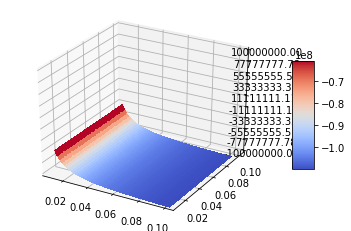

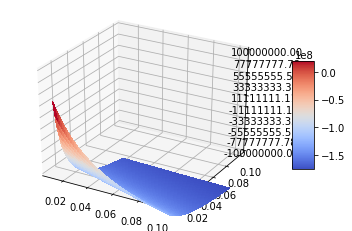

In [86]:
# plot constraint for same input ranges

# calculate constraint functions
Inertia = I(X,Y)
AS = axial(Inertia)
SS = shear(X)

fig1 = plt.figure()
ax = fig1.gca(projection='3d')

# Plot the surface.
surf2 = ax.plot_surface(X, Y, SS, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-100000000, 100000000)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig1.colorbar(surf2, shrink=0.5, aspect=5)

plt.show()

fig2 = plt.figure()
ax = fig2.gca(projection='3d')

# Plot the surface.
surf3 = ax.plot_surface(X, Y, AS, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-100000000, 100000000)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig2.colorbar(surf3, shrink=0.5, aspect=5)

plt.show()

### Optimization with scipy

Now lets use a formal optimizer to do the same. We will use scipy optimizer

Check out the documentation here: https://docs.scipy.org/doc/scipy/reference/optimize.html 
Optimization with scipy is quite powerful and used broadly for optimization applications. It includes many different algorithms for solving optimization problems.

For multi-variate functions (with 2 decision variables or more), scipy has many potential optimization algorithms:

More detail can be found here:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

In [131]:
# optimize using slsqp

# set up function for optimization
# define optimization problem functions and constants

# define problem constants
h = 0.25
b = 0.125
l = 1.
P = 100000.
sigma_yield = 200000000.
tao_yield = 116000000.

# beam mass
def mass(t):
    
    tw = t[0]
    tb = t[1]
    return (2*b*tb + h*tw) 

# axial stress
def axial(t):

    tw = t[0]
    tb = t[1]
    I = (h**3/12.)*tw + (b/6.)*tb**3 + (h**2 * b / 2.)*tb
    return  P*l*h / (2*I) - sigma_yield

# shear stress
def shear(t):
    
    tw = t[0]
    s = 1.5*P / (h * tw) - tao_yield
    return s


In [132]:
# First lets try the problem unconstrained
# Optimize the problem using the built in Newton's method
from scipy.optimize import minimize

minimize(mass, [0.100, 0.100], method="SLSQP")

     fun: -38146972.57500002
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 56
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([-76293945.15000004, -76293945.15000005])

In [145]:
# The objective function goes extremely negative... 
# We have not put bounds on our variables, nor constraints on the stresses.
# Let's try again but now gradients

# specify with constraints
#cons = ({'type': 'ineq', 'fun': axial},
#        {'type': 'ineq', 'fun': shear})
from scipy.optimize import NonlinearConstraint
con1 = NonlinearConstraint(axial, -np.inf, 0)
con2 = NonlinearConstraint(shear, -np.inf, 0)

# dont forget bounds on the variables
bnds = ((0.001, None), (0.001, None))

# set up and check initial conditions
tw = h / 2.
tb = b / 2.
print("Initial mass: ", mass([tw, tb]))
print("Initial axial stress constraint: ", axial([tw, tb]))
print("Initial shear stress constraint: ", shear([tw, tb]))

f = minimize(mass, [tw, tb], method="SLSQP", bounds=bnds, constraints=[con1, con2], 
         options={'maxiter': 100, 'ftol': 1e-06, 'iprint': 1, 'disp': True})


Initial mass:  0.046875
Initial axial stress constraint:  -169659259.25925925
Initial shear stress constraint:  -111200000.0
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.004858202328095407
            Iterations: 11
            Function evaluations: 48
            Gradient evaluations: 11


In [146]:
# constraints for final values?
print(f.x)
print(mass(f.x))
print(axial(f.x))
print(shear(f.x))

[0.00517241 0.0142604 ]
0.004858202328095407
-5.960464477539063e-08
-5.960464477539062e-07


What happens when you remove one or the other constraint?

In [148]:
f = minimize(mass, [tw, tb], method="SLSQP", bounds=bnds, constraints=[con1], 
         options={'maxiter': 100, 'ftol': 1e-06, 'iprint': 1, 'disp': True})

# constraints for final values?
print(f.x)
print(mass(f.x))
print(axial(f.x))
print(shear(f.x))

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.004161559634680389
            Iterations: 11
            Function evaluations: 48
            Gradient evaluations: 11
[0.001      0.01564624]
0.004161559634680389
-1.0132789611816406e-06
484000000.0


In [149]:
f = minimize(mass, [tw, tb], method="SLSQP", bounds=bnds, constraints=[con2], 
         options={'maxiter': 100, 'ftol': 1e-06, 'iprint': 1, 'disp': True})

# constraints for final values?
print(f.x)
print(mass(f.x))
print(axial(f.x))
print(shear(f.x))

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0015431034482783492
            Iterations: 9
            Function evaluations: 40
            Gradient evaluations: 9
[0.00517241 0.001     ]
0.0015431034482783492
974681244.504488
-0.00022311508655548096
